YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


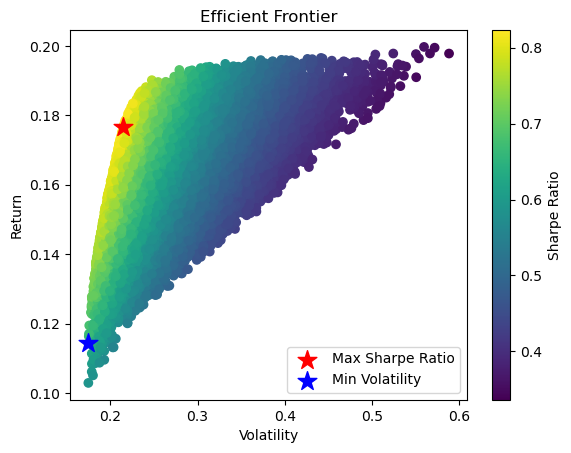

최대 샤프지수 포트폴리오
Return          0.176761
Volatility      0.214742
Sharpe Ratio    0.823131
TSLA            0.324416
AAPL            0.659664
JPM             0.000618
VOO             0.015302
Name: 14857, dtype: float64

최소 변동성 포트폴리오
Return          0.114307
Volatility      0.174762
Sharpe Ratio    0.654074
TSLA            0.012151
AAPL            0.141734
JPM             0.003627
VOO             0.842488
Name: 46401, dtype: float64


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 주식 데이터를 다운로드
tickers = ['TSLA', 'AAPL', 'JPM', 'VOO']
data = yf.download(tickers, start="2022-01-01", end="2024-12-31")['Close']

# 일일 수익률 계산
returns = data.pct_change().dropna()

# 시뮬레이션 횟수
num_simulations = 50000
num_assets = len(tickers)

# 결과를 저장할 배열 초기화
results = np.zeros((3 + num_assets, num_simulations))

# 몬테카를로 시뮬레이션 실행
for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # 포트폴리오 수익률과 변동성 계산
    portfolio_return = np.sum(returns.mean() * weights * 252)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std_dev
    
    # 결과 저장
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    for j in range(len(weights)):
        results[3 + j, i] = weights[j]

# 결과 배열을 데이터프레임으로 변환
results_frame = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + tickers)

# 샤프지수가 최대인 포트폴리오와 변동성이 최소인 포트폴리오 찾기
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]
min_vol_port = results_frame.loc[results_frame['Volatility'].idxmin()]

# 효율적 경계 플롯
plt.scatter(results_frame['Volatility'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port['Volatility'], max_sharpe_port['Return'], color='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_vol_port['Volatility'], min_vol_port['Return'], color='blue', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

# 결과 출력
print("최대 샤프지수 포트폴리오")
print(max_sharpe_port)
print("\n최소 변동성 포트폴리오")
print(min_vol_port)

In [3]:
tem = [ test.values[0] for test in last_price_list ]

# tem = []
# for test in last_price_list:
#     value = test.values[0]  # Series 안에 있는 float 값만 꺼냄
#     tem.append(value)


NameError: name 'last_price_list' is not defined

[*********************100%***********************]  1 of 1 completed
C:\Users\neul\AppData\Local\Temp\ipykernel_13256\3810838515.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
C:\Users\neul\AppData\Local\Temp\ipykernel_13256\3810838515.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
C:\Users\neul\AppData\Local\Temp\ipykernel_13256\3810838515.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

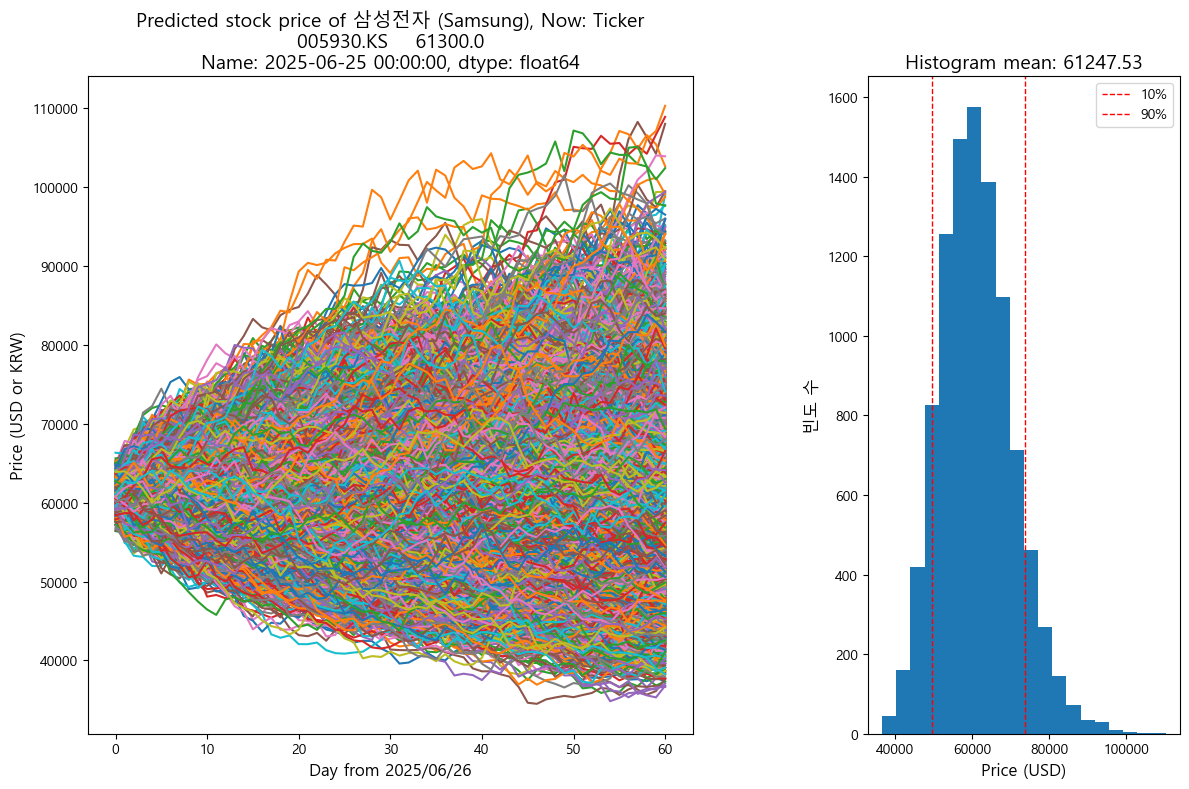

In [60]:
import warnings
warnings.filterwarnings('ignore')

def monte_carlo_simulation(stock_ticker='005930.KS', stock_name='삼성전자 (Samsung)', 
                          months_back=18, num_simulations=10000, simulation_days=60):
    """
    몬테카를로 시뮬레이션을 수행하는 함수
    
    Parameters:
    stock_ticker (str): 주식 티커 심볼
    stock_name (str): 주식 이름
    months_back (int): 과거 몇 개월 데이터를 가져올지
    num_simulations (int): 시뮬레이션 횟수
    simulation_days (int): 시뮬레이션할 일수
    
    Returns:
    tuple: (시뮬레이션 결과 데이터프레임, 마지막 예측 가격 리스트)
    """
    # 한글 폰트 설정 (그래프에서 한글 깨짐 방지)
    path = "c:/Windows/Fonts/malgun.ttf"  # Windows 기준 '맑은 고딕' 폰트 경로
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

    # 데이터 조회 기간 설정
    today = date.today()
    startD = today - relativedelta(months=months_back)
    endD = today

    # 주가 정보 다운로드
    stock_data = yf.download(stock_ticker, startD, endD)

    # 일간 수익률 계산 (종가 기준)
    returns = stock_data['Close'].pct_change()

    # 일간 수익률의 표준편차 = 변동성
    daily_vol = returns.std()

    df = pd.DataFrame()      # 시뮬레이션 결과 저장용 데이터프레임
    last_price = stock_data['Close'].iloc[-1]  # 마지막 종가
    last_price_list = []     # 마지막 예측 가격 저장 리스트

    # 시뮬레이션 시작
    for x in range(num_simulations):
        T = simulation_days  # 시뮬레이션 일수
        count = 0
        price_list = []

        # 첫 날 가격 = 마지막 종가 * 무작위 수익률 반영
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        # T일 동안 가격 시뮬레이션
        for y in range(T):
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        # 시뮬레이션 결과를 데이터프레임에 저장
        df[x] = price_list
        last_price_list.append(price_list[-1])

    # 시각화
    plt.figure(figsize=(12, 8))
    plt.plot(df)
    plt.title(f'{stock_name} 몬테카를로 시뮬레이션 ({num_simulations:,}회)')
    plt.xlabel('일수')
    plt.ylabel('주가')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df, last_price_list

# 함수 사용 예시
# df, last_price_list = monte_carlo_simulation()

# # 주가 데이터 다운로드 및 시뮬레이션, 시각화를 위한 라이브러리들
# import yfinance as yf                     # 야후 파이낸스에서 주가 데이터 수집
# import pandas as pd                       # 데이터프레임 생성 및 처리
# from datetime import date                 # 오늘 날짜 계산
# from dateutil.relativedelta import relativedelta  # 월 단위 날짜 계산
# import numpy as np                        # 수치 계산, 랜덤 수 생성
# import matplotlib.pyplot as plt           # 시각화
# import matplotlib.font_manager as fm      # 폰트 설정
# from matplotlib import rc                 # matplotlib 설정

# def main():
#     # 한글 폰트 설정 (그래프에서 한글 깨짐 방지)
#     path = "c:/Windows/Fonts/malgun.ttf"  # Windows 기준 '맑은 고딕' 폰트 경로
#     font_name = fm.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)

#     # 데이터 조회 기간 설정 (오늘부터 18개월 전까지)
#     today = date.today()
#     startD = today - relativedelta(months=18)
#     endD = today

#     # 주가 정보 다운로드 (삼성전자)
#     stock_ticker = '005930.KS'
#     stock_name = '삼성전자 (Samsung)'
#     stock_data = yf.download(stock_ticker, startD, endD)

#     # 비트코인 등 다른 종목도 사용 가능 (주석 처리됨)
#     # stock_ticker = 'BTC-USD'
#     # stock_name = '비트코인 (BTC/USD)'    
#     # stock_data = yf.download(stock_ticker, startD, endD)

#     # 일간 수익률 계산 (종가 기준)
#     returns = stock_data['Close'].pct_change()

#     # 일간 수익률의 표준편차 = 변동성
#     daily_vol = returns.std()

#     NUM_SIMULATIONS = 10000  # 몬테카를로 시뮬레이션 횟수
#     df = pd.DataFrame()      # 시뮬레이션 결과 저장용 데이터프레임
#     last_price = stock_data['Close'].iloc[-1]  # 마지막 종가
#     last_price_list = []     # 마지막 예측 가격 저장 리스트

#     # 시뮬레이션 시작
#     for x in range(NUM_SIMULATIONS):
#         T = 60  # 시뮬레이션 일수 (약 3개월)
#         count = 0
#         price_list = []

#         # 첫 날 가격 = 마지막 종가 * 무작위 수익률 반영
#         price = last_price * (1 + np.random.normal(0, daily_vol))
#         price_list.append(price)

#         # 이후 T일 동안 주가 경로 생성
#         for y in range(T):
#             if count == 251:  # 최대 252일 (1년 영업일) 제한 (실제 영향 없음)
#                 break
#             # 전날 가격 * 무작위 수익률 반영
#             price = price_list[count] * (1 + np.random.normal(0, daily_vol))
#             price_list.append(price)
#             count += 1

#         # 각 시뮬레이션 결과를 데이터프레임에 열로 저장
#         df[x] = price_list

#         # 마지막 가격만 따로 리스트에 저장 (평균/분위수용)
#         last_price_list.append(price_list[-1])  # float 값으로 저장됨

#     # ❌ 오류 발생 가능 코드: float에 `.values[0]`은 사용할 수 없음
#     # tem = [ test.values[0] for test in last_price_list ] ← 이건 Series일 때만 가능
#     # ✅ 아래처럼 고치면 됨:
#     tem = last_price_list

#     # 시각화 시작
#     plt.figure(figsize=(12, 8))  # 전체 그래프 크기 설정

#     # 왼쪽: 시뮬레이션 경로, 오른쪽: 히스토그램
#     figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
#     figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

#     # 모든 시뮬레이션 경로 그래프
#     figL.plot(df)
#     figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price,2)}', fontsize=14)
#     figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
#     figL.set_ylabel('Price (USD or KRW)', fontsize=12)

#     # 마지막 가격 분포 히스토그램
#     figR.hist(tem, bins=20)

#     # 분위수 라인 추가 (10%, 90%)
#     figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
#     figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')

#     # 평균선 표시
#     str_mean = str(round(np.mean(tem), 2))
#     figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
#     figR.set_xlabel('Price (USD)', fontsize=12)
#     figR.set_ylabel('빈도 수', fontsize=12)
#     figR.legend()

#     # 레이아웃 조정 및 그래프 출력
#     plt.tight_layout()
#     plt.show()

# # main 함수 실행
# main()

[*********************100%***********************]  1 of 1 completed
c:\Anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


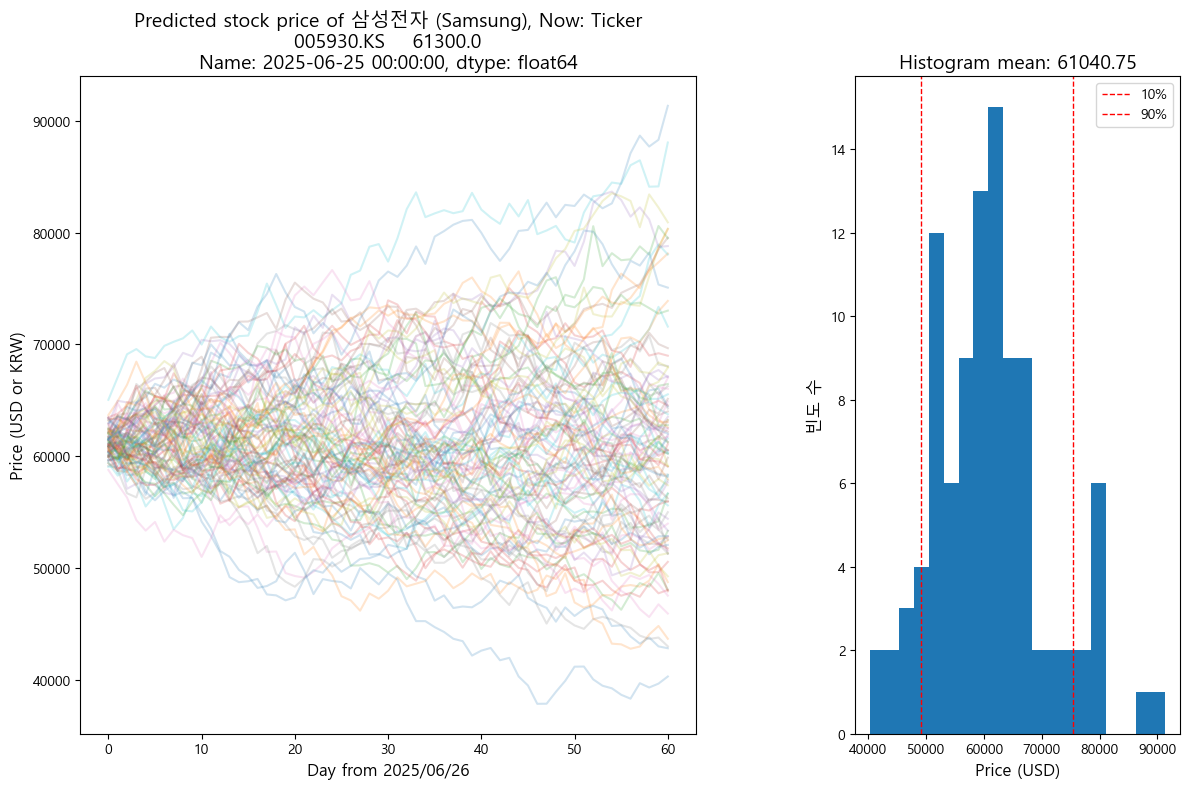

In [6]:
# 필요한 라이브러리 임포트
import yfinance as yf                         # 야후 파이낸스에서 주가 데이터를 불러오는 라이브러리
import pandas as pd                           # 데이터프레임 처리용
from datetime import date                     # 오늘 날짜를 얻기 위한 모듈
from dateutil.relativedelta import relativedelta  # 날짜 연산용 (ex. 18개월 전 계산)
import numpy as np                            # 수치 계산용
import matplotlib.pyplot as plt               # 그래프 시각화용
import matplotlib.font_manager as fm          # 한글 폰트 설정용
from matplotlib import rc                     # 그래프에서 폰트 적용을 위한 rc 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 함수
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"      # Windows에서 '맑은 고딕' 폰트 경로
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)              # matplotlib에서 사용할 폰트로 설정

# 주가 데이터를 불러오는 함수 (기본: 최근 18개월)
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)  # yfinance로 주가 다운로드

# 평균 수익률(mu)과 변동성(sigma) 계산
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()  # 일간 수익률 계산
    mu = returns.mean()                                  # 평균 수익률
    sigma = returns.std()                                # 표준편차(변동성)
    return mu, sigma

# 기존 방식과 달리: 수익률 기반 반복 시뮬레이션 함수
def run_simulations(last_price, daily_vol, num_simulations=100, T=60):
    """
    간단한 수익률 기반으로 주가를 시뮬레이션하고,
    전체 경로와 마지막 가격 리스트를 반환
    """
    df = pd.DataFrame()
    last_price_list = []

    for x in range(num_simulations):
        count = 0
        price_list = []

        # 첫 날 가격 계산
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        for y in range(T):
            if count == 251:
                break
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        df[x] = price_list
        last_price_list.append(price_list[-1])

    return df, last_price_list

# 메인 함수: 실행 순서 정의
def main():
    df = pd.DataFrame()
    set_korean_font()
    stock_ticker = '005930.KS'
    stock_name = '삼성전자 (Samsung)'
    stock_data = load_stock_data(stock_ticker)
    mu, sigma = calc_return_stats(stock_data)
    last_price = stock_data['Close'].iloc[-1]
    

    # 🎯 기존 방식
    # price_paths = monte_carlo_simulation(last_price, mu, sigma)

    # ✅ 새 방식: run_simulations 이용
    price_df, last_price_list = run_simulations(last_price, sigma)  # sigma = daily_vol

    # 새 방식에 맞게 plot도 직접 수정
    today = date.today()
    plt.figure(figsize=(12, 8))
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # 시뮬레이션 경로 시각화
    figL.plot(price_df.iloc[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price, 2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (USD or KRW)', fontsize=12)

    # 마지막 가격 히스토그램
    tem = [ test.values[0] for test in last_price_list ]
    figR.hist(tem, bins=20)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (USD)', fontsize=12)
    figR.set_ylabel('빈도 수', fontsize=12)
    figR.legend()

    plt.tight_layout()
    plt.show()

# 프로그램 실행
main()